# Assignment

Random Forest
About the data: Let’s consider a Company dataset with around 10 variables and 400 records. The attributes are as follows:  Sales -- Unit sales (in thousands) at each location  Competitor Price -- Price charged by competitor at each location  Income -- Community income level (in thousands of dollars)  Advertising -- Local advertising budget for company at each location (in thousands of dollars)  Population -- Population size in region (in thousands)  Price -- Price company charges for car seats at each site  Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site  Age -- Average age of the local population  Education -- Education level at each location  Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location  US -- A factor with levels No and Yes to indicate whether the store is in the US or not The company dataset looks like this:
Problem Statement: A cloth manufacturing company is interested to know about the segment or attributes causes high sale. Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,make_scorer,f1_score
from sklearn.model_selection import GridSearchCV,cross_val_score, train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree

In [3]:
company_data = pd.read_csv("Company_Data.csv")
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
company_data.shape

(400, 11)

In [5]:
company_data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
company_data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [8]:
#lets see how many categories are there in ShelveLoc
print("no of Types :",len(company_data['ShelveLoc'].unique()))
print("Frequency of ShelveLoc category")
company_data['ShelveLoc'].value_counts()

no of Types : 3
Frequency of ShelveLoc category


Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

<AxesSubplot: xlabel='ShelveLoc', ylabel='count'>

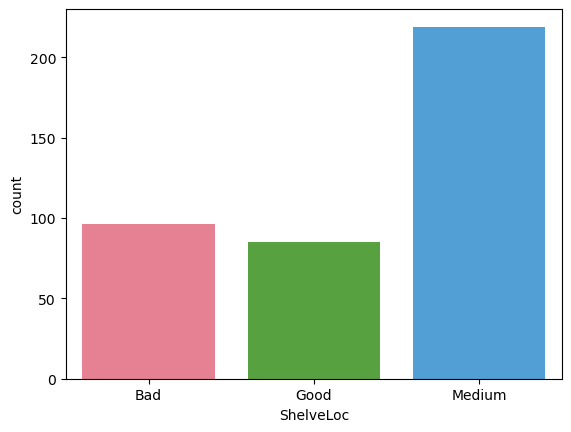

In [9]:
sns.countplot(x="ShelveLoc", data=company_data,palette="husl")

<AxesSubplot: xlabel='Urban', ylabel='count'>

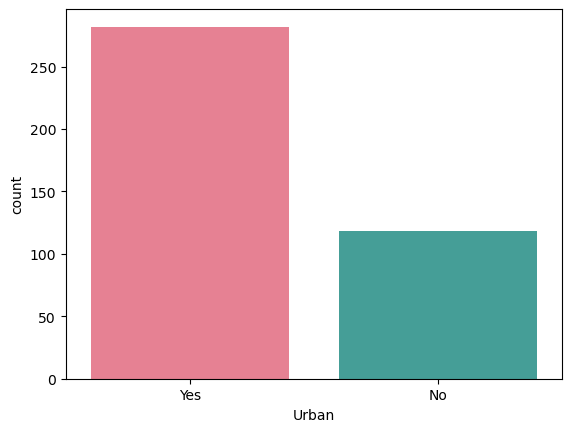

In [10]:
sns.countplot(x="Urban", data=company_data,palette="husl")

<AxesSubplot: xlabel='US', ylabel='count'>

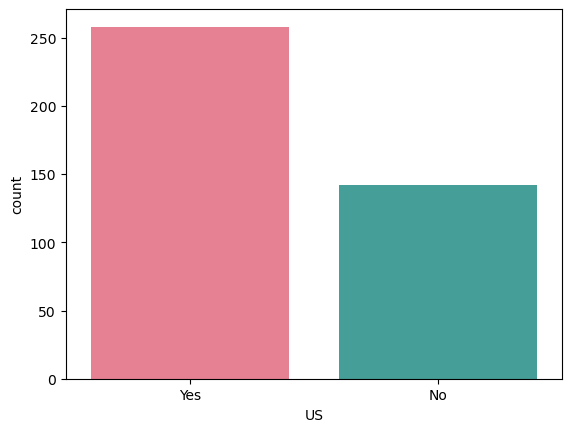

In [11]:
sns.countplot(x="US", data=company_data,palette="husl")

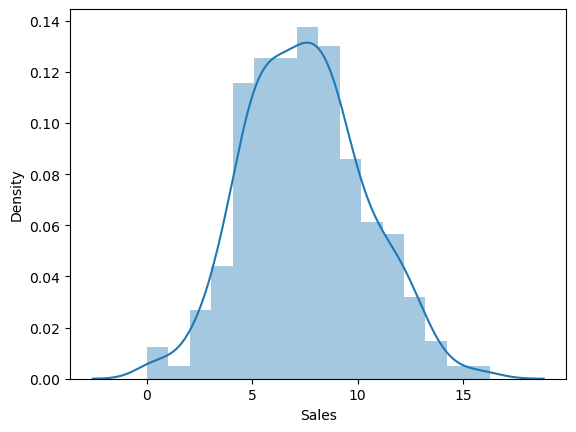

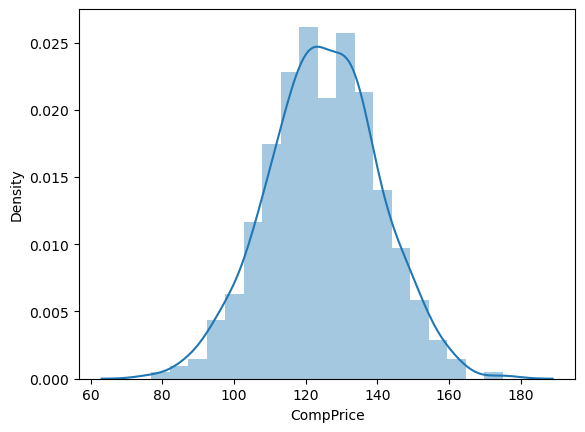

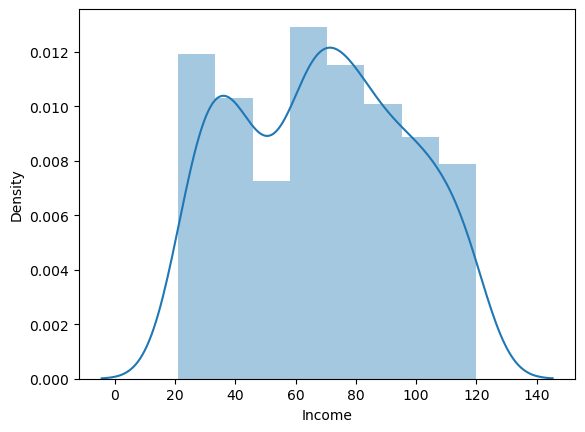

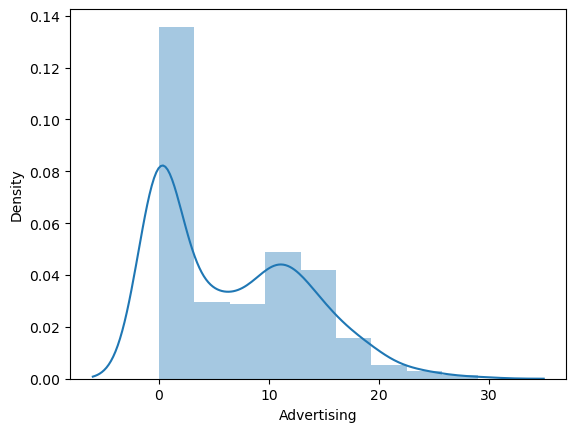

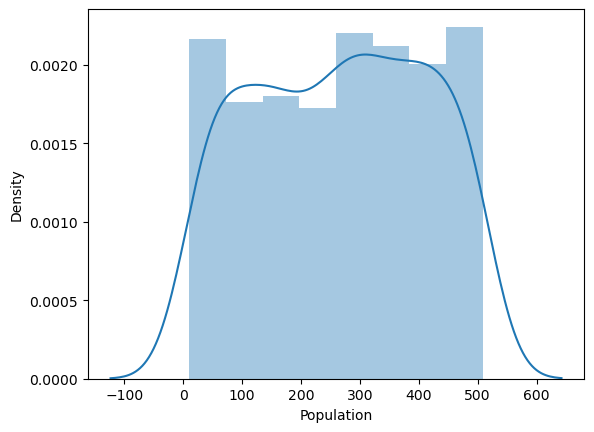

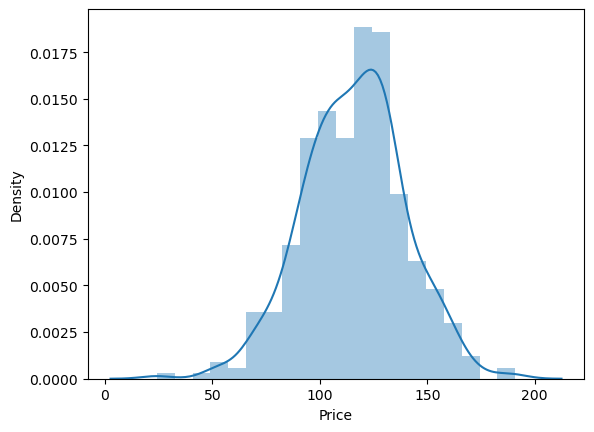

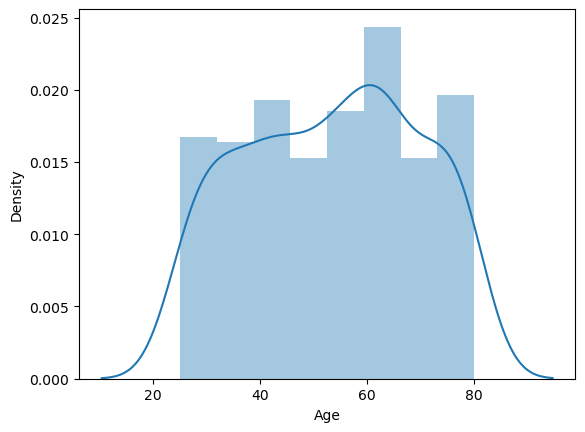

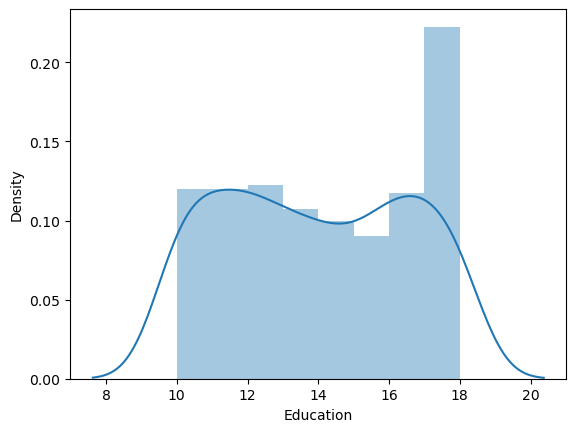

In [12]:
#Distribution for numerical features
numerical_features = [fe for fe in company_data.columns if company_data[fe].dtype!='O']
for fe in numerical_features:
    sns.distplot(company_data[fe])
    plt.show()

<AxesSubplot: >

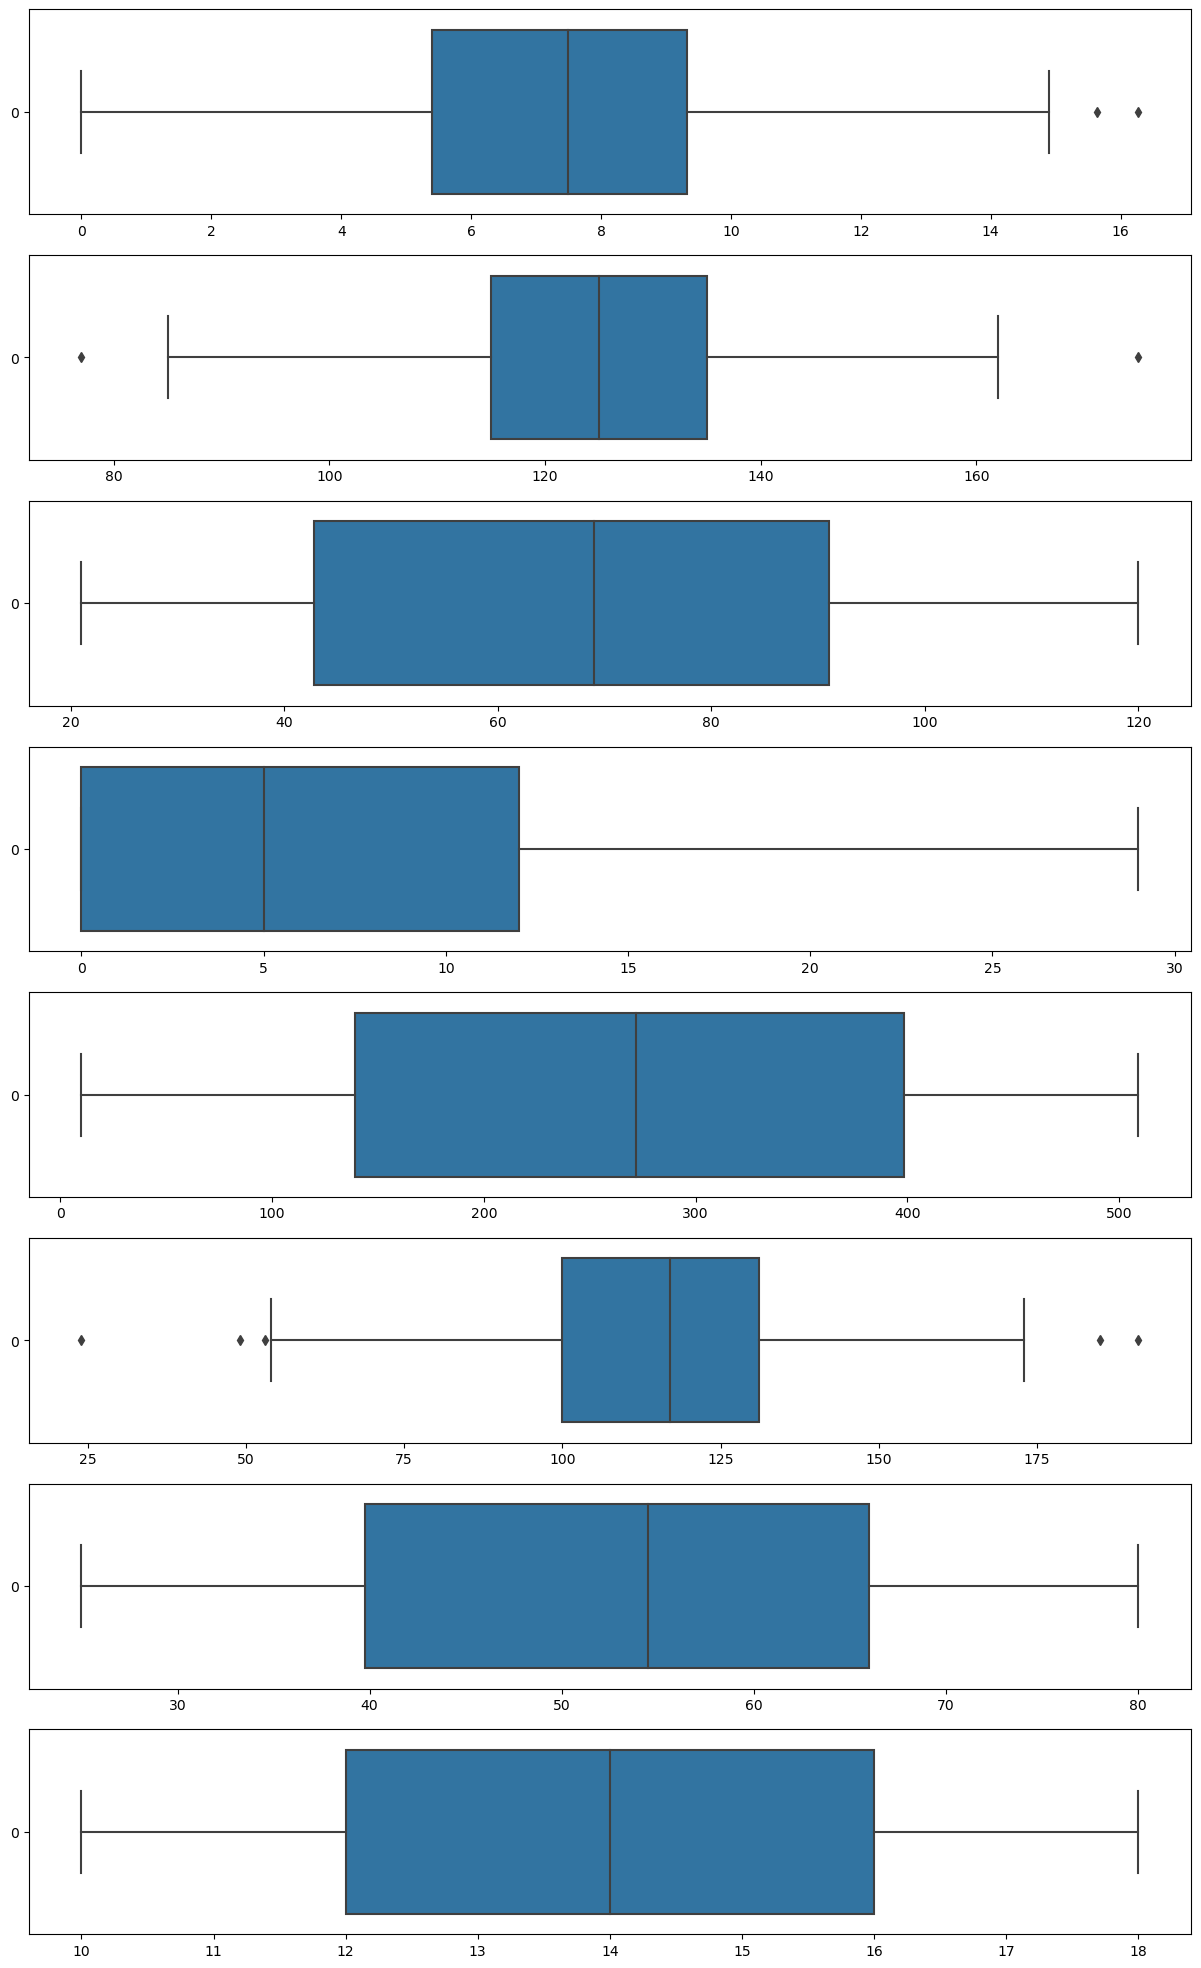

In [13]:
#Check for outliers
fig, ax =plt.subplots(8,1, figsize=(15,25)) 

sns.boxplot(company_data['Sales'] ,ax=ax[0],orient='h')
sns.boxplot(company_data['CompPrice'] ,ax=ax[1],orient='h')
sns.boxplot(company_data['Income'] ,ax=ax[2],orient='h')
sns.boxplot(company_data['Advertising'] ,ax=ax[3],orient='h')
sns.boxplot(company_data['Population'] ,ax=ax[4],orient='h')
sns.boxplot(company_data['Price'] ,ax=ax[5],orient='h')
sns.boxplot(company_data['Age'] ,ax=ax[6],orient='h')
sns.boxplot(company_data['Education'] ,ax=ax[7],orient='h')

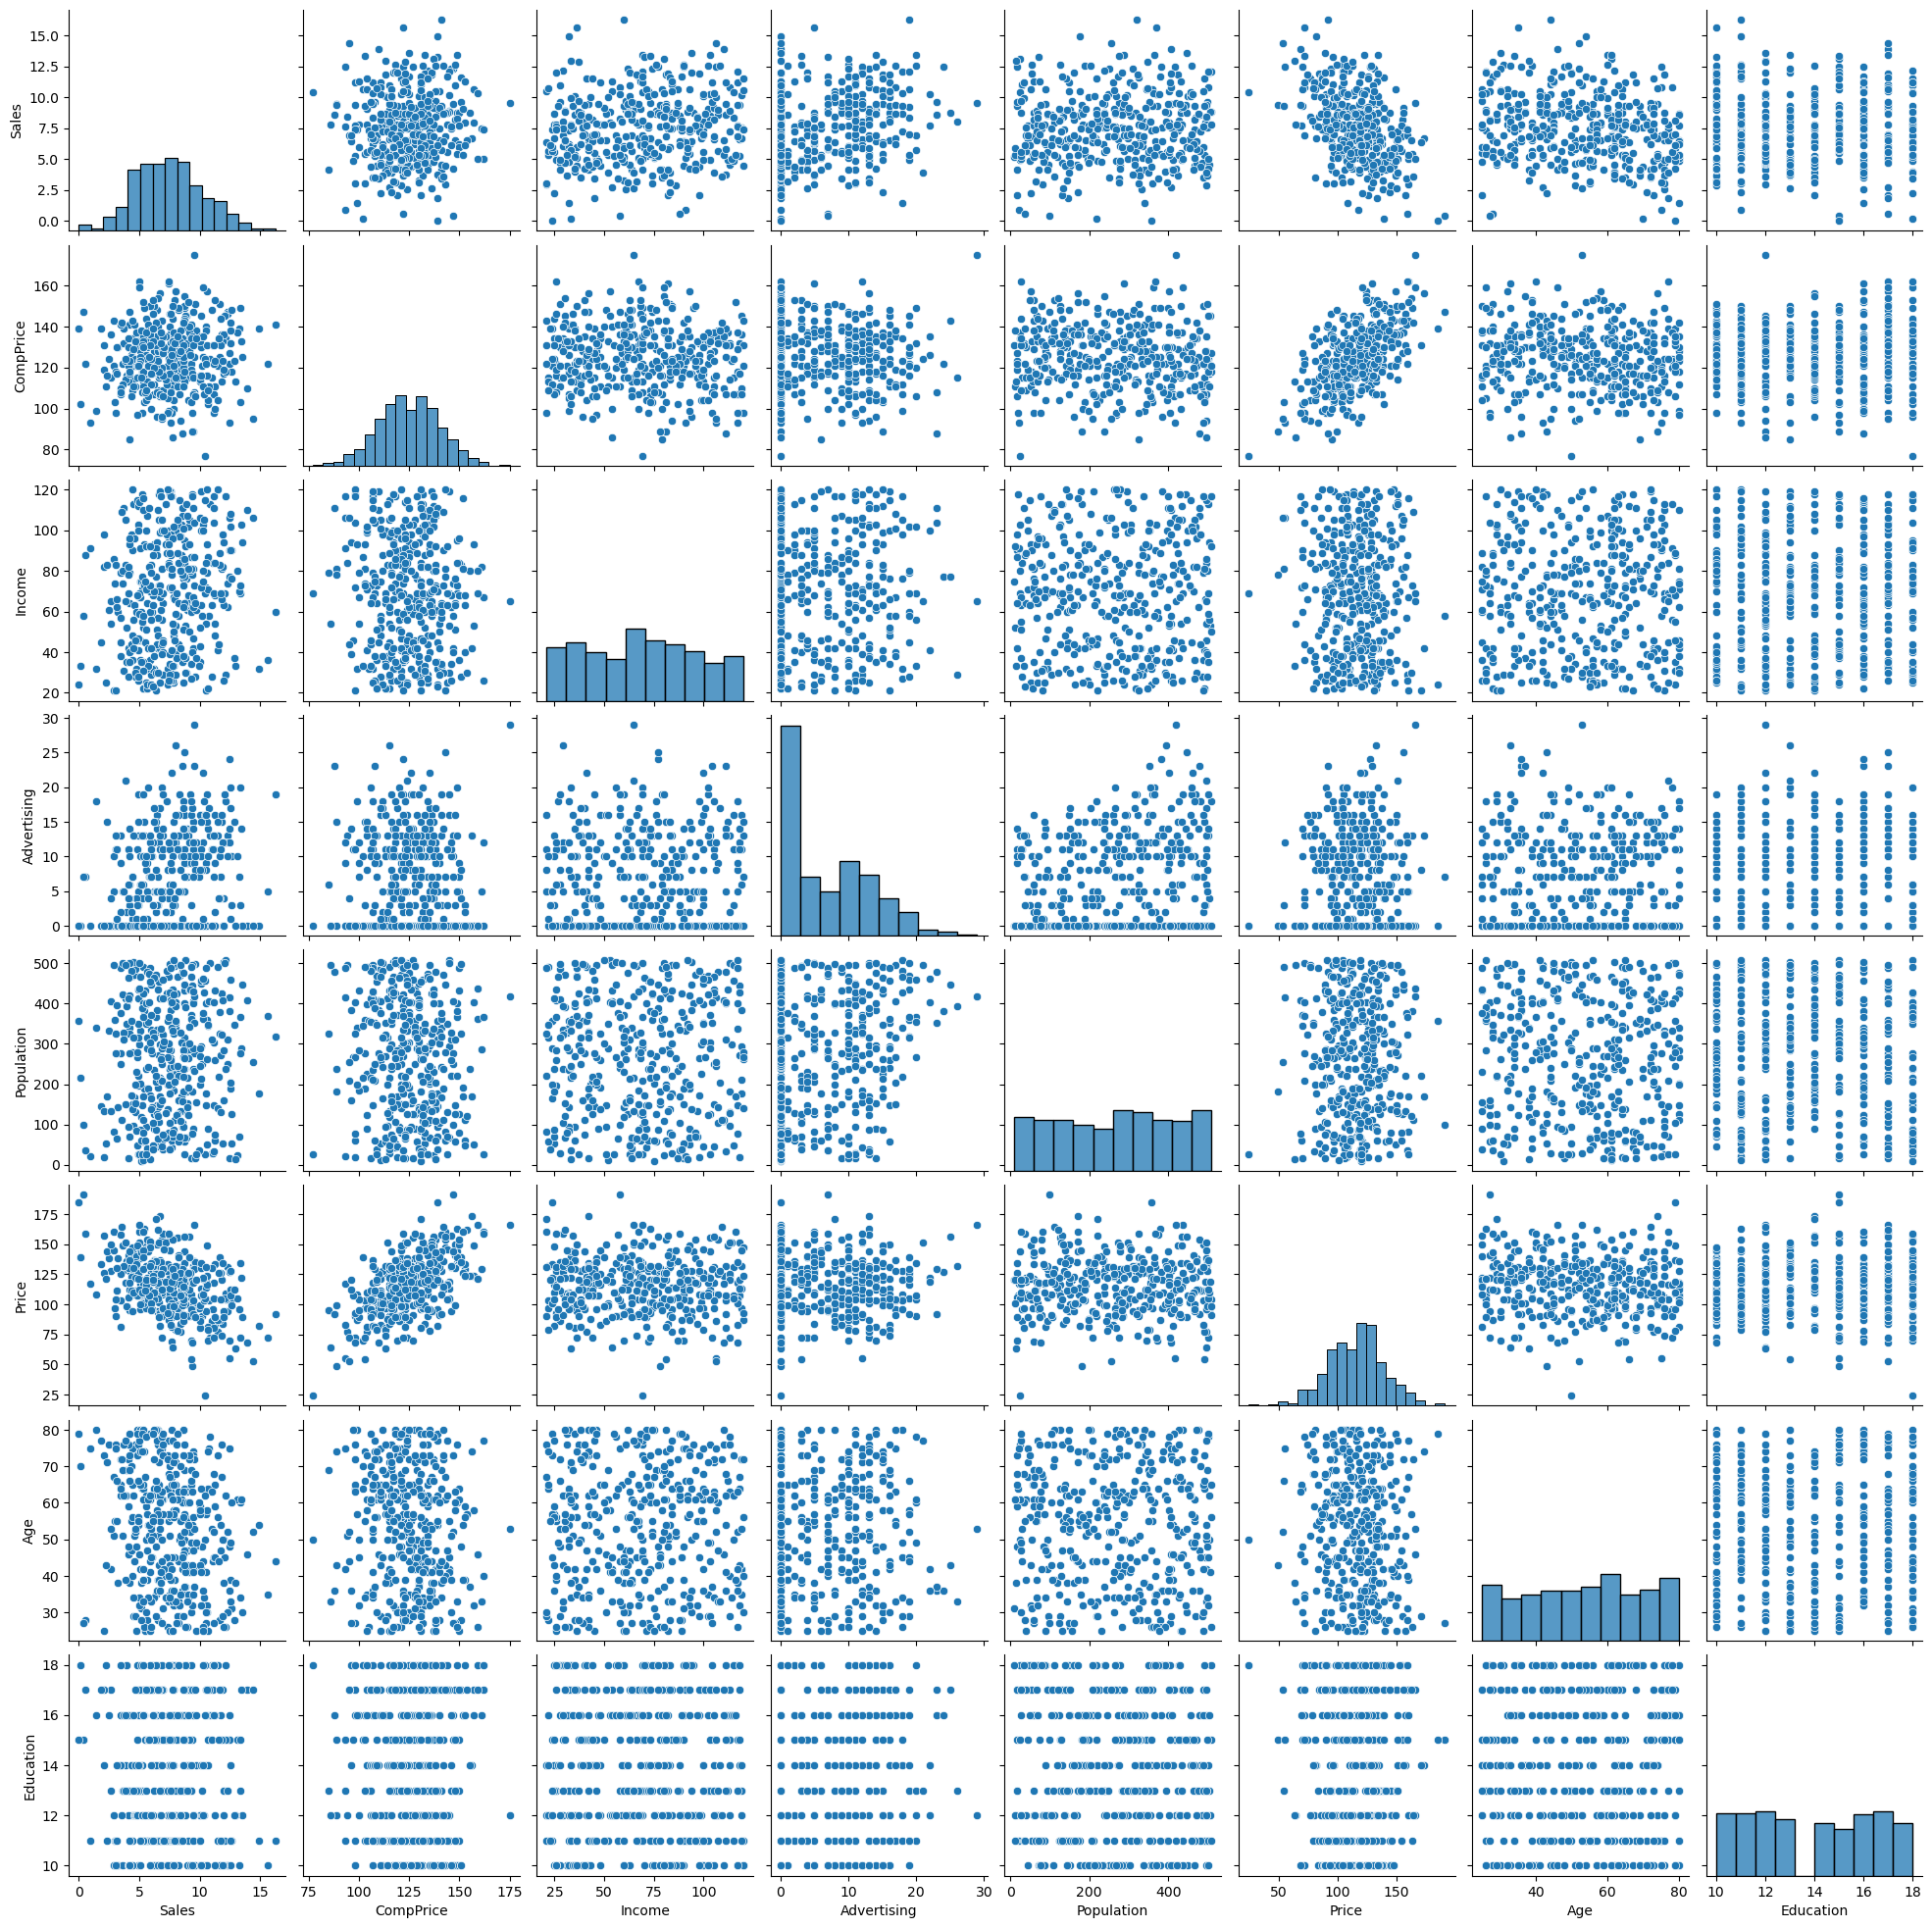

In [14]:
sns.pairplot(company_data)

In [15]:
company_data.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


<AxesSubplot: >

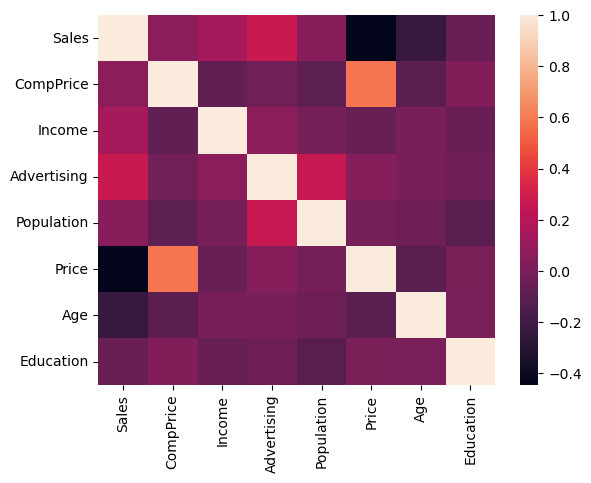

In [16]:
sns.heatmap(company_data.corr())

In [17]:
#Our target variable is sales so we need to convert it into category type first
converted_data = company_data.copy()
converted_data['Sales_category'] = pd.cut(x=converted_data['Sales'], bins = [0,7.50,17], labels=['Low','High'], right = False)
converted_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_category
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


<AxesSubplot: xlabel='Sales_category', ylabel='count'>

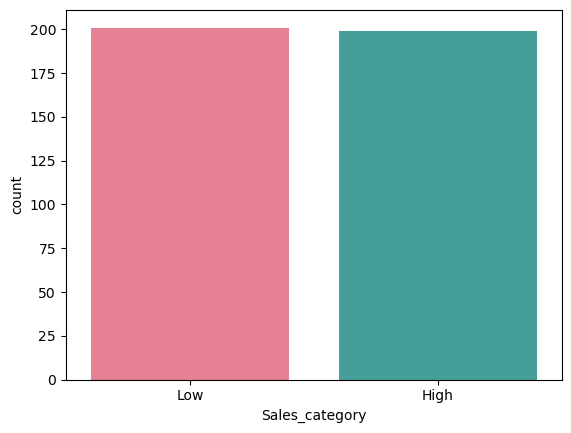

In [18]:
sns.countplot(x="Sales_category", data=converted_data,palette="husl")

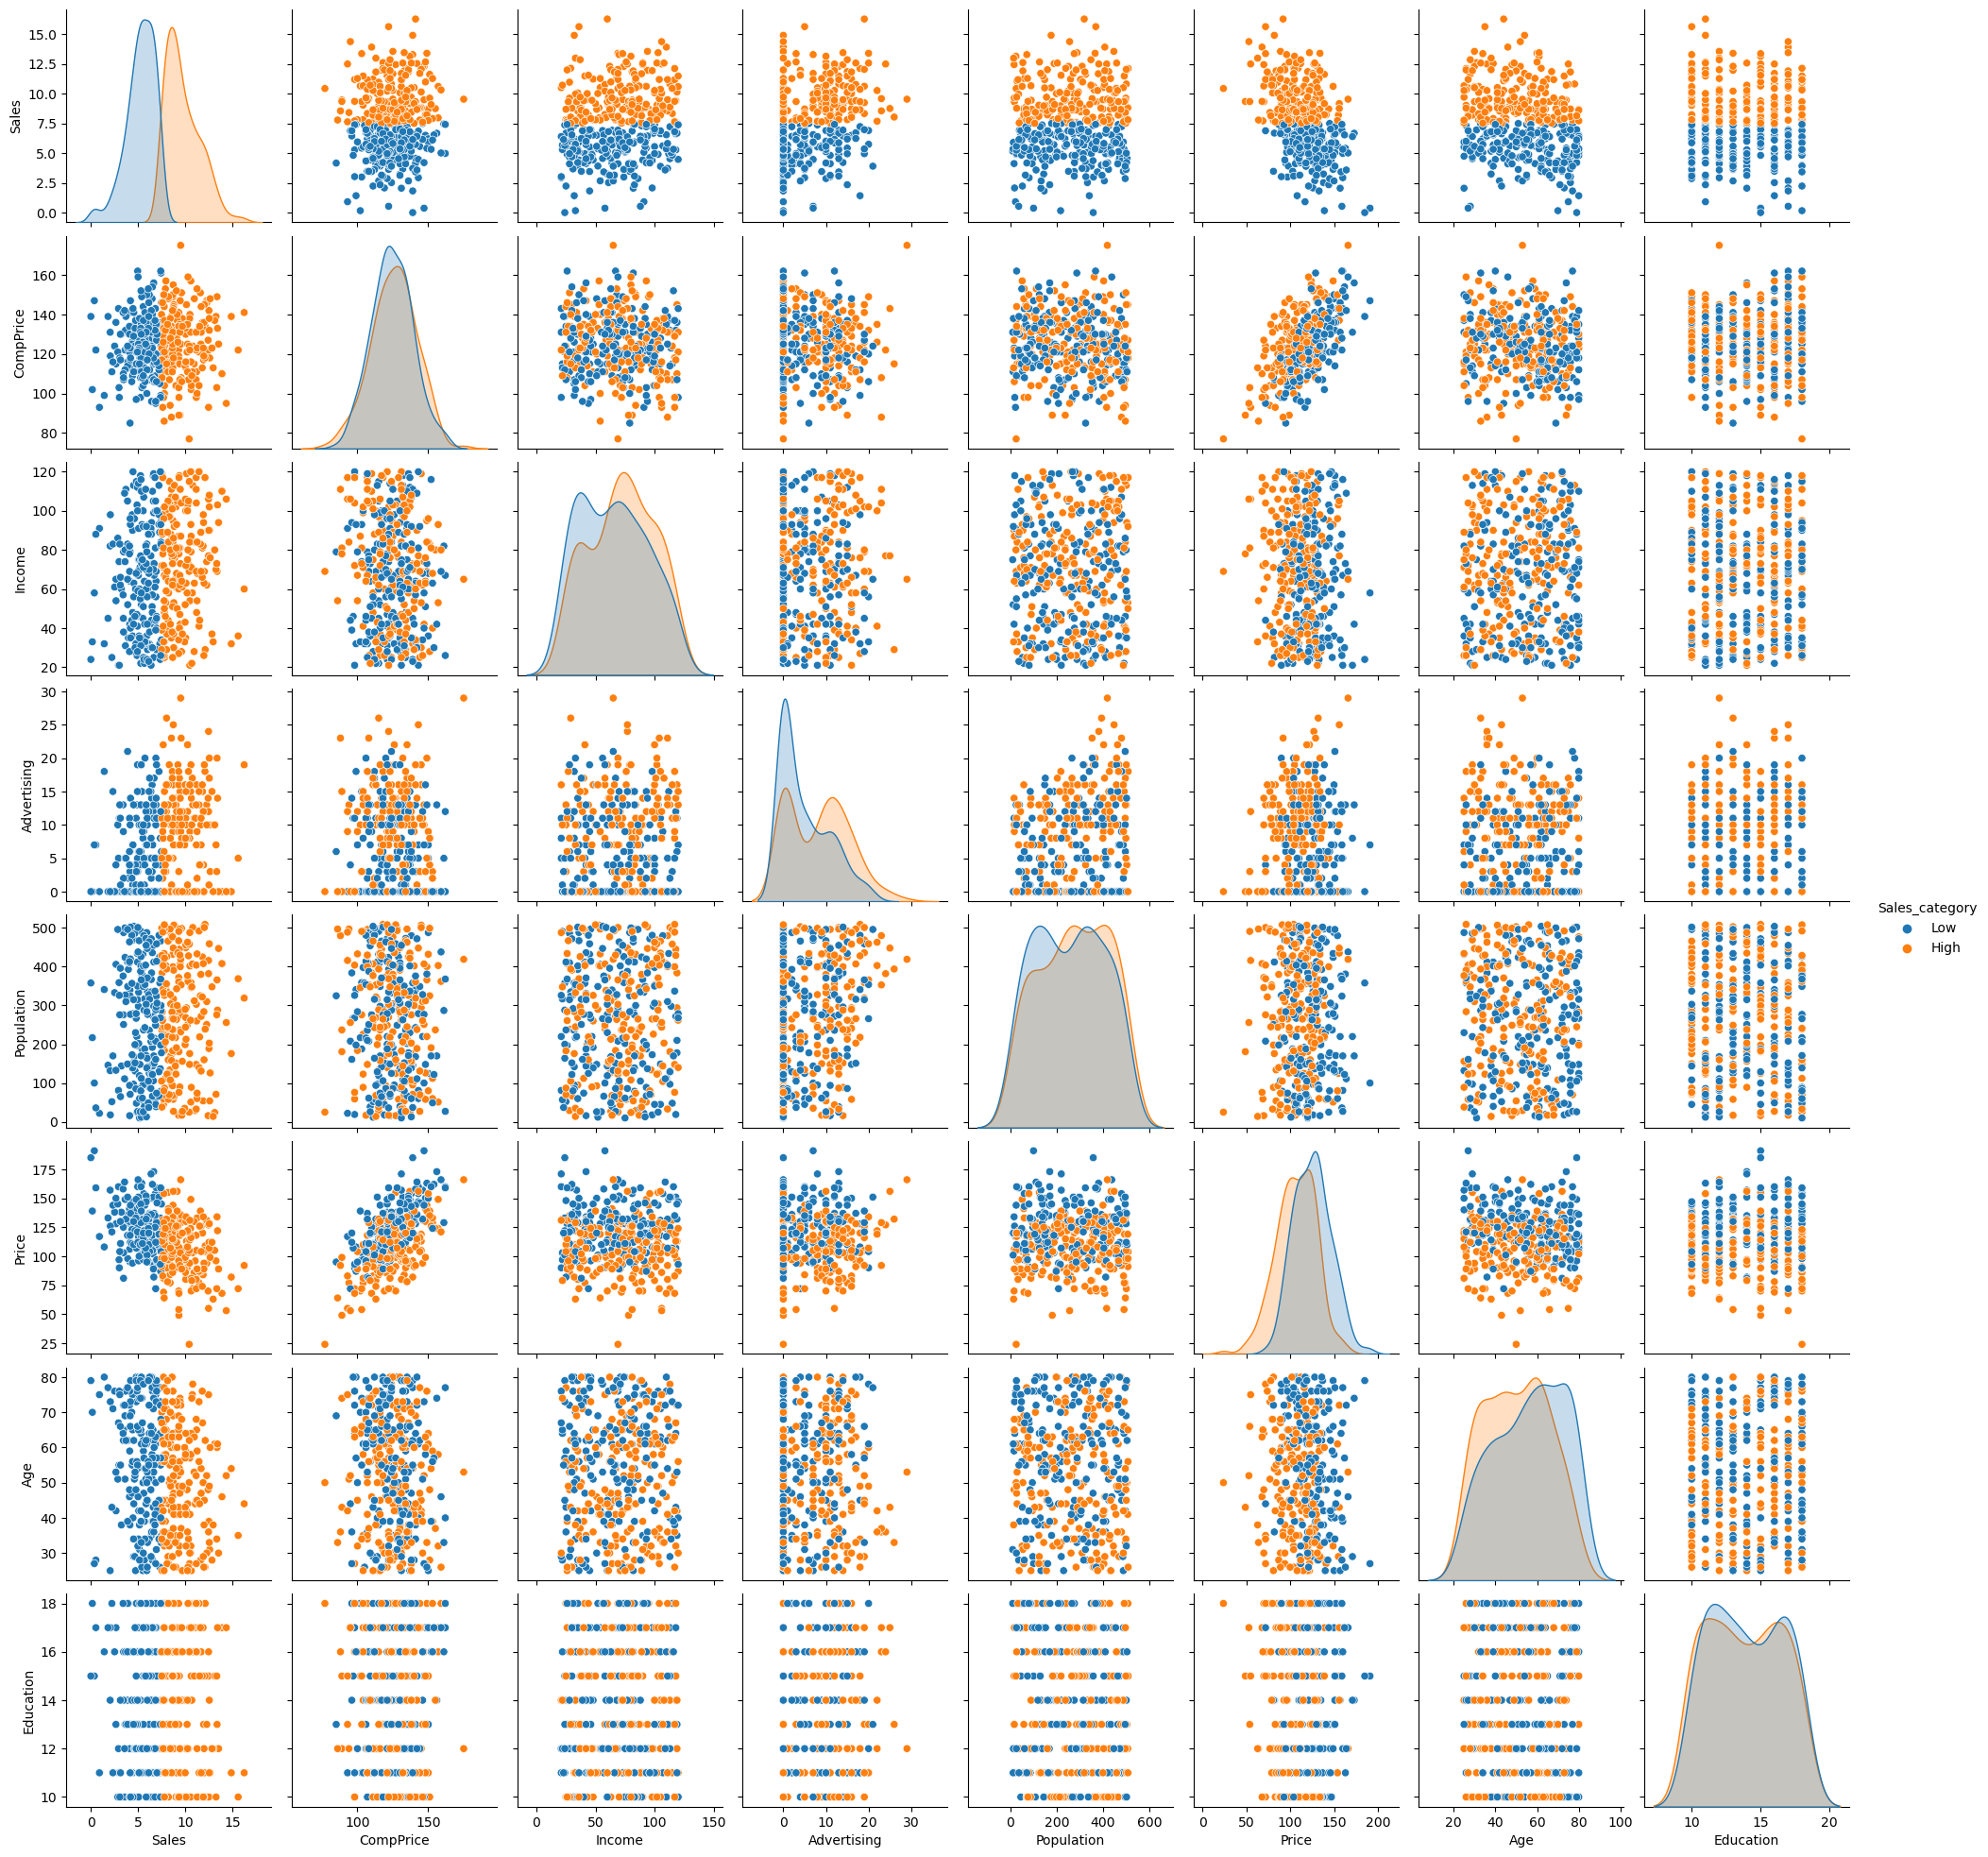

In [19]:
#relation with sales category with all other features
sns.pairplot(data=converted_data, hue = 'Sales_category')

In [20]:
#Dropping sales as we have the target as a Sales_category
#creating dummies for the categorical variables
df_1 = converted_data.drop('Sales',axis=1)
df_1 = pd.get_dummies(df_1.iloc[:,:-1])
df_1.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [21]:
#label encoder for Sales_category
df_1['Sales'] = converted_data['Sales_category']
encoder = LabelEncoder()
df_1['Sales'] = encoder.fit_transform(df_1['Sales'])
df_1.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Sales
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,0
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,0
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,0
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,1


In [22]:
#Data Splitting
X = df_1.drop('Sales',axis=1)
y = df_1['Sales']

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=0)

In [24]:
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)
print(X_train.shape)

(100, 14)
(100,)
(300,)
(300, 14)


In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rf = RandomForestClassifier(random_state = 0)

In [27]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [28]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [29]:
rf_train_accuracy = accuracy_score(y_train,y_train_pred)
rf_test_accuracy = accuracy_score(y_test,y_test_pred)

In [30]:
print("training set accuracy:",rf_train_accuracy)
print("testing set accuracy:",rf_test_accuracy)

training set accuracy: 1.0
testing set accuracy: 0.8


In [31]:
#Hyperparameter tuning with RandomizedSearchCv
from sklearn.model_selection import RandomizedSearchCV
rf_1 = RandomForestClassifier(random_state=42)
parameters = {'max_depth':[int(x) for x in np.linspace(10, 110, num=11)],
              'n_estimators':[i for i in range(10, 200, 5)],
              'min_samples_leaf':[i for i in range(1, 10)],
              'criterion' :['gini', 'entropy'],
              'min_samples_split':[i for i in range(1, 10)],
              'max_features': ['auto', 'sqrt', 'log2']}
scorer = make_scorer(accuracy_score)

In [32]:
clf = RandomizedSearchCV(rf_1,parameters,cv=5,n_iter=10,scoring=scorer)

In [33]:
clf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9],
                                        'n_estimators': [10, 15, 20, 25, 30, 35,
                                                         40, 45, 50, 55, 60, 65,
                                                         70, 75, 80, 85, 90, 95,
           

In [34]:
print(clf.best_params_)

{'n_estimators': 55, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'entropy'}


In [35]:
#using these parameters building a Rarf = RandomForestClassifier(random_state = 0)ndom_Forest
model = RandomForestClassifier(n_estimators=55,
                               min_samples_split=9,
                               min_samples_leaf=1,
                               max_features='log2',max_depth=10,
                               criterion='entropy',random_state=42)

In [36]:
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       min_samples_split=9, n_estimators=55, random_state=42)

In [37]:
model_train_pred = model.predict(X_train)
model_test_pred = model.predict(X_test)

In [38]:
model_train_accuracy = accuracy_score(y_train,model_train_pred)
model_test_accuracy = accuracy_score(y_test,model_test_pred)

In [39]:
print("training set accuracy:",rf_train_accuracy)
print("testing set accuracy:",rf_test_accuracy)

training set accuracy: 1.0
testing set accuracy: 0.8


In [40]:
print(classification_report(y_test,model_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81        50
           1       0.80      0.86      0.83        50

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100



In [49]:
#comparing predicted test values with acutal values
cmp_df = pd.DataFrame(y_test)
cmp_df['Predicted Sales'] = model_test_pred
cmp_df

,Sales,Predicted Sales
308,0,0
343,1,1
173,1,1
100,1,1
248,1,1
...,...,...
272,0,0
15,0,1
56,0,0
311,1,1


In [50]:
importances = model.feature_importances_

In [51]:
feature_names = X_train.columns

In [52]:
feature_importances = pd.DataFrame({'feature':feature_names,'importance':importances})
feature_importances

,feature,importance
0,CompPrice,0.100370
1,Income,0.072059
2,Advertising,0.105738
3,Population,0.072061
4,Price,0.259615
5,Age,0.133761
6,Education,0.049100
7,ShelveLoc_Bad,0.047356
8,ShelveLoc_Good,0.085128
9,ShelveLoc_Medium,0.027729


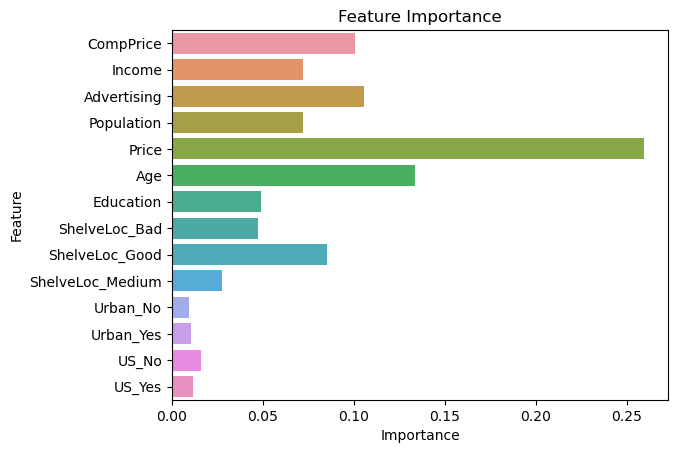

In [53]:
sns.barplot(x='importance',y='feature',data=feature_importances)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()